In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AtrousConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

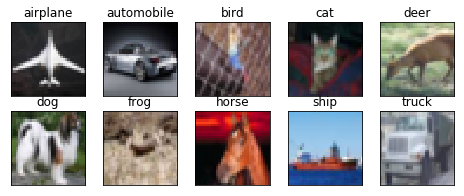

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(AtrousConvolution2D(48, 3, 3,atrous_rate=(2,2),border_mode='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(192, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(AtrousConvolution2D(192, 3, 3,atrous_rate=(2,2),border_mode='same', activation='relu',))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(96, 1, activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3,))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,))
model.add(Activation('relu'))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:304: UserWarning: The `AtrousConvolution2D` layer  has been deprecated. Use instead the `Conv2D` layer with the `dilation_rate` argument.
  warnings.warn('The `AtrousConvolution2D` layer '
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:308: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", dilation_rate=(2, 2), padding="same")`
  return Conv2D(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:308: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), activation="relu", dilation_rate=(2, 2), padding="same")`
  return Conv2D(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       9408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 192)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       331968    
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=40)`
  if sys.path[0] == '':


Epoch 1/40
390/390 [==============================] - 29s 74ms/step - loss: 1.7952 - acc: 0.3267 - val_loss: 1.5581 - val_acc: 0.4290
Epoch 2/40
390/390 [==============================] - 26s 66ms/step - loss: 1.3893 - acc: 0.4926 - val_loss: 1.2524 - val_acc: 0.5448
Epoch 3/40
390/390 [==============================] - 25s 65ms/step - loss: 1.1883 - acc: 0.5703 - val_loss: 1.1321 - val_acc: 0.5868
Epoch 4/40
390/390 [==============================] - 26s 65ms/step - loss: 1.0500 - acc: 0.6222 - val_loss: 1.0172 - val_acc: 0.6364
Epoch 5/40
390/390 [==============================] - 26s 66ms/step - loss: 0.9501 - acc: 0.6603 - val_loss: 0.9492 - val_acc: 0.6698
Epoch 6/40
390/390 [==============================] - 26s 66ms/step - loss: 0.8579 - acc: 0.6953 - val_loss: 0.9062 - val_acc: 0.6836
Epoch 7/40
390/390 [==============================] - 26s 66ms/step - loss: 0.7899 - acc: 0.7207 - val_loss: 0.8634 - val_acc: 0.7001
Epoch 8/40
390/390 [==============================] - 26s 67ms

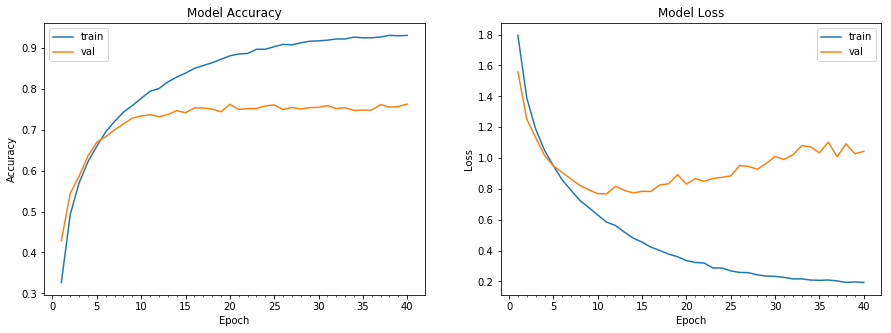

Accuracy on test data is: 76.33


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))